# Bernoulli, entropy and spamlet  

In [2]:
# load modules for math and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn plots look a bit nicer than default matplotlib
#
#import seaborn as sns
#sns.set(palette="bright")

## Probability

A random Bernoulli (binary) process has only two possible outcomes; these are often labelled as True,False or 0, 1. One well-known example of such a process is flipping a coin to obtain either heads (H) or tails (T).
The probability of getting a given outcome $i$ is usually represented as $p_i$.  
By definition, the total probability of all possible outcomes must always add up to one

 $$ \sum p_i = p_H + p_T = 1 $$

In other words: only one outcome can occur, and one outcome must occur.  

For a perfectly "fair" coin the probabilities are equal

 $$ p_H = p_T = 0.5 $$

In classical probability theory, these events can be simple or compound. If there are $\Omega$ possible outcomes for a simple event, then $p_i=1/\Omega$ for all $i$. For example, if you flip a (fair) coin once ($\Omega = 2$), then the probability of obtaining heads or tails is $1/2$. If you flip four coins (or one coin 4 times), then $\Omega=2^4$ because the outcome probabilities for each flip are totally independent of other outcomes. We say that the system has no memory, and most physical systems are like this.

In statistical mechanics, the outcome of a possibly compound event like this is called a microstate. The ergodic hypothesis states that given a sufficiently long time, all microstates will be observed and all points in event space will be accessed. This is the (unproven!) foundation of statistical mechanics.

## numpy.random

Many useful tools for generating random numbers are located in the "numpy.random" module.  We start by considering the `rand` function which provides samples from a uniform distribution 

<blockquote>
Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``
</blockquote>
    
This module can be loaded independently

      import numpy.random as nprand
    
or accessed as part of numpy.  

For example, we can generate 9 random numbers that should be distributed uniformly between 0 (inclusive) and 1.0 (exclusive).

In [3]:
# Create an array of the given shape and populate it with 
#random samples from a uniform distribution over [0, 1).
np.random.rand(9)

array([0.0384657 , 0.7899211 , 0.23178687, 0.44411009, 0.07126211,
       0.64630625, 0.97677999, 0.95698297, 0.06512445])

Other distributions (ie. binomial, Gaussian) can be simulated by starting with a uniform distribution and applying an appropriate transformation of variables.  The numpy.random module also includes convenient routines for obtaining random numbers from many useful distributions.   Although the Bernoulli distribution is not provided explicitly, there are several methods which can be used to produce binary random numbers.

One approach is to generate  floating point uniform random values and map numbers greater than 0.5 onto `1` and less than 0.5 onto `0`.

In [33]:
coinflip = np.random.rand(9)

# loop over each element one after another
#
for item in coinflip:
    print( item > 0.5 , end=', ', flush=True )
print( '\n' )
    
# list comprehension is a more compact way to loop
#
print( [item > 0.5 for item in coinflip], '\n' )

# numpy 
#
print( coinflip > 0.5 )

True, True, True, False, True, False, True, False, True, 

[True, True, True, False, True, False, True, False, True] 

[ True  True  True False  True False  True False  True]


The third approach will produce a numpy `ndarray` which can have one or more elements all with the same type of `boolean`.  The `__sizeof__` method can be used to determine the amount of memory (in bytes) required to store each element.  Although we might expect that a boolean value could be represented using a single bit, there is considerable overhead required to store a python object.

In [34]:
a = ( np.random.rand(9) > 0.5 )
print('type: ', type(a) )
print('element type: ', type(a[0]) )

type:  <class 'numpy.ndarray'>
element type:  <class 'numpy.bool_'>


In [35]:
print('element size: ', a[0].__sizeof__() )
print( 'element attributes: ',  dir(a)[0:4], '...', dir(a)[-4:] )

element size:  25
element attributes:  ['T', '__abs__', '__add__', '__and__'] ... ['trace', 'transpose', 'var', 'view']


### Discussion
Should we instead use a slightly different comparison operator?

In [36]:
print( np.random.rand(9) >= 0.5 )

[False False  True  True  True  True False  True  True]


### (in)consistent calling conventions
Another option is to use the "randint" function.  Remember that information about python modules and functions can be found in several different ways eg.

    help(numpy.randint)
    ?(numpy.randint)
    dir(numpy.randint)

        Help on package numpy.random in numpy:

        NAME
            numpy.random

        DESCRIPTION
            ========================
            Random Number Generation
            ========================

In [37]:
# Return random integers from `low` (inclusive) to `high` (exclusive).

# Calling "randint" with low=0 and high=1 does not produce a random
# sequence of 1's and 0's.
#
print( np.random.randint(low=0, high=1, size=9 ), '<==== only zeros' )

# Instead, the function is written to follow the python convention
# where the upper limit is excluded.
#
print( np.random.randint(low=0, high=2, size=9 ) )

#
#
print( np.random.randint(2, size=9 ) )

[0 0 0 0 0 0 0 0 0] <==== only zeros
[1 0 0 0 0 0 0 1 0]
[1 1 0 1 0 0 0 0 0]


I think a case could be made that this calling convention violates the "Principle of Least Astonishment"

      https://en.wikipedia.org/wiki/Principle_of_least_astonishment

which is basically that a system should behave in a manner consistent with how users are likely to expect it to behave; that is, users should not be astonished at the way it interprets input or provides output.

On the other hand, one could also argue that the exclusive upper bound is very pythonic (ie. commonly used in python).  Also note that other languages also use the exclusive upper bound ie.

      https://stackoverflow.com/questions/363681/how-do-i-generate-random-integers-within-a-specific-range-in-java?rq=1


In Java 1.7 or later, the standard way to do this is:

    import java.util.concurrent.ThreadLocalRandom;

        // nextInt is normally exclusive of the top value,
        // so add 1 to make it inclusive
        int randomNum = ThreadLocalRandom.current().nextInt(min, max + 1);

Conclusion: ensure that your expectations are consistent with how your tools actually work.

Note: There is currently a `numpy.random.random_integers` function that behaves the other way.  Sadly, it appears to be deprecated and may not be supported in future versions of numpy.

In [6]:
# Return random integers of type np.int from the “discrete uniform” distribution in the closed interval [low, high]
print( np.random.random_integers(low=0, high=1, size=9 ) )

[1 0 0 0 0 1 1 1 1]


C:\Users\bjackel\Miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


Perhaps the best alternative is provided by `numpy.random.choice` which has a clear calling convention and can be used for more general applications.

In [7]:
print( np.random.choice([0,1], size=9, p=[0.5, 0.5] ) )
print( np.random.choice(['yes', 'maybe', 'no'], size=9, p=[0.25, 0.5, 0.25] ) )

[0 0 0 1 1 0 0 0 0]
['maybe' 'maybe' 'yes' 'maybe' 'maybe' 'no' 'maybe' 'no' 'maybe']


## Entropy and Information

A sequence of numbers might be thought of as random if each successive observation is "surprising" or communicates additional information beyond what was provided by the previous ones.  

For example, after seeing the first few symbols (values) in this sequence

 $$\{0,0,0,0,0,0,0,0 \ldots\}$$

we can make a pretty good guess about the next value, but for this sequence

$$\{0,1,0,0,1,1,0,1 \ldots\}$$

it is not obvious what the next few values are likely to be.

<img src="https://assets.amuniversal.com/321a39e06d6401301d80001dd8b71c47" />






### Shannon entropy

A quantitative definition of entropy introduced by Shannon[1948]

$$  H = -\sum_{i=1}^n p_i \; log{p_i} $$

has a familiar physical analog in statistical mechanics and allows us to determine the maximum amount of information that can be transmitted over a noisy digital communication channel.

The logarithm is often taken with base 2

$$  H = -\sum_{i=1}^n p_i \; log_2{p_i} = -\frac{1}{\ln 2} \,\sum_{i=1}^n p_i \; \ln{p_i} $$

to produce a result in terms of bits per symbol. Some properties of the entropy are

1) $H(p_1,\ldots,p_N)$ is a concave function of the $p_i$. 

2) for a given $N$, the uniform distribution $p_i=1/N$ has the maximum entropy $H$. 

3) $H(p_1,\ldots,p_N)$ is zero if and only if one of the $p_i=1$.  In other words, if there is only one possible outcome then no new information is provided by observing that event. 



We can easily prove that the Shannon entropy is a maximum when all the probabilities are equal, $p_i=1/N$, corresponding to the classical limit of simple events.

\begin{eqnarray}
\frac{\partial}{\partial p_j}H&=&\frac{\partial}{\partial p_j}\left[-\sum_ip_i\ln(p_i)\right]\\
&=&\frac{\partial}{\partial p_j}\left[p_1\ln(p_1)+\ldots+p_j\ln(p_j)+\ldots+(1-p_1-\ldots-p_j-\ldots-p_{N-1})\ln(1-p_1-\ldots-p_j-\ldots-p_{N-1})\right],
\end{eqnarray}

where the second line uses the fact that the $p_i$s are not independent (for example $p_1+p_2=1$). So

\begin{eqnarray}
\frac{\partial}{\partial p_j}H&=&\left[\ln(p_j)+1-\ln(1-p_1-\ldots-p_j-\ldots-p_{N-1})-1\right].\\
\end{eqnarray}

Setting this to zero gives

$$p_j=1-p_1-\ldots-p_j-\ldots-p_{N-1},$$

but because the right hand side is the probability for any other outcome, $p_j=p_i=1/N$ for all $i,j$, so all the probabilities are equal. The maximum entropy is therefore

$$H_{\rm max}=\frac{N}{N}\ln\left(\frac{1}{N}\right)=\ln(N).$$

And we're back to where we started, under the assumption that $\Omega=N$ for simple events.



### Bernoulli process

A Bernoulli (binary) process has two discrete outcomes (eg. true and false) that occur with probability $p$ and $q=1-p$.  The entropy of this process

$$  H(p) = -p\,\log(p) - q\,\log(q) = -p\,\log(p) - (1-p)\,\log(1-p) $$

has a maximum of 1 bit per outcome

 $$  {{\partial H(p)}\over{\partial p}} = -\left[ \log p + {p \over p} - \log[1-p] - {{1-p}\over{1-p}} \right] 
  = -\log p + \log(1-p) = 0 $$

$$  \exp\left(\log p\right) = \exp\left(\log(1-p)\right)  \qquad\Rightarrow\qquad p=1-p $$

at $p=q=0.5$ where the outcome of this system is least predictable.  As shown in the following example the entropy is zero at the endpoints $p=q=0$ where the outcome is totally predictable.

### Efficient encoding

Shannon derived an expression for entropy a completely different way. Suppose that we have a radio antenna that broadcasts digital signals
encoded in the bitstrings $X_1,\;X_2,\;\ldots X_m$, where for example $X_1=0110010111\ldots$. The question Shannon posed is: what are the resources required to represent all of these bitstrings? An alternative way of asking the question is: how much memory is required to store all of the bitstrings? Shannon found that the quantity $H(X)$, now called the Shannon entropy, gives the mean number of bits per string required. This expression is also referred to as Shannon's lossless coding theorem.

Consider a concrete example. Suppose that the antenna broadcasts the four numbers 0, 1, 2, and 3, all with probablity 1/4. Then you could store all four digits efficiently using the binary representation 00, 01, 10, and 11. This requires two bits, which should also coincide with Shannon entropy:

$$H(0,1,2,3)=-\frac{1}{4}\log_2\left(\frac{1}{4}\right)*4=\log_2(4)=2\log_2(2)=2,$$

as expected.

Now instead suppose that the four numbers are broadcast with probabilities $1/2$, $1/4$, $1/8$, and $1/8$, respectively. Can we be more efficient with the encoding of the four numbers , to minimize (on average) the total number of bits we need to transmit / store? The Shannon entropy suggests that we only need an average bitstring length of 

$$H(0,1,2,3)=-\frac{1}{2}\log_2\left(\frac{1}{2}\right)-\frac{1}{4}\log_2\left(\frac{1}{4}\right)-(2)\frac{1}{8}\log_2\left(\frac{1}{8}\right)=\frac{1}{2}+\frac{2}{4}+\frac{6}{8}=\frac{14}{8}=1\frac{3}{4}$$

bits, which is less than 2. 

### Gibbs entropy formula

    https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)
    
The macroscopic state of a system is characterized by a distribution on the microstates. The entropy of this distribution is given by the Gibbs entropy formula, named after J. Willard Gibbs. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_{i}$ is the energy of microstate i, and $p_i$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$S=-k_{{\text{B}}}\,\sum _{i}p_{i}\ln \,p_{i}$$

This S is almost universally called simply the entropy. It can also be called the statistical entropy or the thermodynamic entropy without changing the meaning.

<ipython-input-38-1bbd82c9c517>:8: RuntimeWarning: divide by zero encountered in log
  H = -p*np.log(p) - (1-p)*np.log(1-p)
<ipython-input-38-1bbd82c9c517>:8: RuntimeWarning: invalid value encountered in multiply
  H = -p*np.log(p) - (1-p)*np.log(1-p)


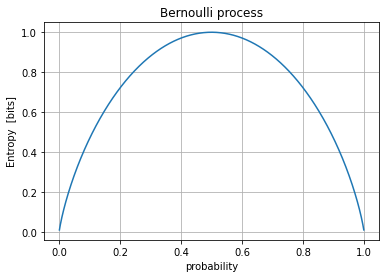

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set() #"bright")

p = np.arange(0.00, 1.00, 0.001)
H = -p*np.log(p) - (1-p)*np.log(1-p)
plt.plot(p,H/np.log(2.0))
plt.xlabel('probability')
plt.ylabel('Entropy  [bits]')
plt.title('Bernoulli process')
plt.grid(True)

## Monkey Shakespeare

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3c/Chimpanzee_seated_at_typewriter.jpg" />

https://en.wikipedia.org/wiki/Infinite_monkey_theorem

The infinite monkey theorem states that a monkey hitting keys at random on a typewriter keyboard for an infinite amount of time will almost surely type any given text, such as the complete works of William Shakespeare. In fact the monkey would almost surely type every possible finite text an infinite number of times. However, the probability of a universe full of monkeys typing a complete work such as Shakespeare's Hamlet is so tiny that the chance of it occurring during a period of time hundreds of thousands of orders of magnitude longer than the age of the universe is extremely low (but technically not zero).

In this context, "almost surely" is a mathematical term with a precise meaning, and the "monkey" is not an actual monkey, but a metaphor for an abstract device that produces an endless random sequence of letters and symbols. One of the earliest instances of the use of the "monkey metaphor" is that of French mathematician Émile Borel in 1913,[1] but the first instance may be even earlier.

Variants of the theorem include multiple and even infinitely many typists, and the target text varies between an entire library and a single sentence. Jorge Luis Borges traced the history of this idea from Aristotle's On Generation and Corruption and Cicero's De natura deorum (On the Nature of the Gods), through Blaise Pascal and Jonathan Swift, up to modern statements with their iconic simians and typewriters. In the early 20th century, Borel and Arthur Eddington used the theorem to illustrate the timescales implicit in the foundations of statistical mechanics.

<img src="http://minnov8.com/site/wp-content/uploads/2013/11/monkey-cartoon.jpg">

In [39]:
# Start with the classic quote,
#
full_quote = 'To be, or not to be? That is the question—'
print('Full quote: ', full_quote)

# Simplify by stripping punctuation and converting to lower case.
#
charlist = [c.lower() for c in full_quote if c.isalpha() or c==' ']
print('Simplified quote: ', ''.join(charlist) )
print('Length of simplified quote: ', len(charlist) )

# Get a list of the unique characters along with "lookup" index
# where each element points to the corresponding unique character.
#
uchars, uindx, ucounts= np.unique(charlist, return_inverse=True, return_counts=True)
print('Unique characters: ', ''.join( uchars ) )
print('Number of unique characters: ', len(uchars) )

nchars = len(charlist)
print('Number of ', str(nchars), ' character combinations of 27 possibilities: ', 27**nchars)
print('Probability of typing "to be..." at random: ', 27**-nchars)

Full quote:  To be, or not to be? That is the question—
Simplified quote:  to be or not to be that is the question
Length of simplified quote:  39
Unique characters:   abehinoqrstu
Number of unique characters:  13
Number of  39  character combinations of 27 possibilities:  66555937033867822607895549241096482953017615834735226163
Probability of typing "to be..." at random:  1.5024955617274797e-56


In [10]:
"""
What is the entropy (in bits per symbol) for a uniform 27-key typewriter?
"""

p27 = 1.0/27.0 * np.ones(27)
entropy =  -np.sum(np.log2(p27) * p27)
print('Entropy of uniform channel [bits per key]', entropy )

Entropy of uniform channel [bits per key] 4.754887502163469


In [11]:
# So how long will it take a monkey to type Hamlet?

# Don't pull the same file every time!  Make a local copy to reduce
# traffic and be able to keep working if network not available or
# file is moved.
#
import urllib.request
url = r'http://www.gutenberg.org/files/1524/1524-0.txt'
bytedata = urllib.request.urlopen( url ).read()

# Get a local copy with browser or "wget" command.

In [12]:
# Note that the file contains a preamble about the text (metadata).
# A more careful analysis might remove all this, but for simplicity 
# we will ignore this detail.
#
#bytedata[0:9].decode('ascii')
print( bytedata[3:99].decode('ascii') )


Project Gutenberg EBook of Hamlet, by William Shakespeare

This eBook is for the use of anyo


In [13]:
#import urllib.request
##url = r'http://www.gutenberg.org/cache/epub/1524/pg1524.txt'
#url = r'http://www.gutenberg.org/files/1524/1524-0.txt'
#with urllib.request.urlopen( url ) as response:
#   data = response.read()

#print(html) #html.decode()

In [14]:
# Change bytes to characters
# +ignore the first 4 "magic" bytes (file type)
# +ignore everything except a-z and spaces
# +change all letters to lower case
#
data = bytedata.decode() #'utf-8')
charlist = [c.lower() for c in data if c.isalpha() or c==' ']
print('Length of simplified Hamlet: ', len(charlist) )

# This is one way to count how many times each letter occurs.
# Using numpy might be faster, but this is easy to understand.
#
catalog = {}
for symbol in charlist:
    
    if symbol in catalog:
        catalog[symbol] += 1  #increment
    else:
        catalog[symbol] = 1  # initialize
        
print( catalog ) 

Length of simplified Hamlet:  181732
{'p': 2462, 'r': 9139, 'o': 12856, 'j': 200, 'e': 17565, 'c': 3409, 't': 14066, ' ': 31720, 'g': 2849, 'u': 4983, 'n': 9739, 'b': 2110, 'k': 1415, 'f': 3124, 'h': 9245, 'a': 11324, 'm': 4644, 'l': 6862, 'y': 3554, 'w': 3425, 'i': 10005, 's': 9450, 'd': 5674, 'v': 1347, 'x': 206, 'æ': 1, 'q': 230, 'z': 127, 'à': 1}


### Question \#1: what is the entropy of "simplified Hamlet" (Spamlet) in bits per character?
    
### Question \#2: what is the probability that a monkey typing 167774 characters with a uniform random selection of 27-keys would produce Spamlet?  In other words, how many different sequences with 167774 characters are there?

### Question \#3: how does the probability change if the chance of hitting any given key was not 1/27, but the same as the actual distribution of Spamlet?

### Question \#4: determine the joint probability of each 2-key sequence eg. 'aa', 'ab', 'ac' from Spamlet.  How does the probability of producing Spamlet change if the monkey hits keys according to this distribution?

### Question \#5: calculate the entropy of  2-key sequences for Spamlet, and then for entire words.

### Optional Question \#6: write a program to generate sequences of text that sound somewhat like Shakespeare.  See for inspiration http://www.elsewhere.org/journal/pomo/ 

In [15]:
random_seed = numpy.random.seed(seed=1)
print( random_seed )
print( numpy.random.choice([0,1], size=9, p=[0.5, 0.5] ) )
print( numpy.random.choice([0,1], size=9, p=[0.5, 0.5] ) )

numpy.random.seed(seed=1)
print( numpy.random.choice([0,1], size=9, p=[0.5, 0.5] ) )

NameError: name 'numpy' is not defined